# ★Chapter5：様々なグラフ・チャートによるビジュアライゼーション

## ●01　グラフやチャートで利用するライブラリ

リスト5.1　インポートするライブラリ

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots
import squarify

## ●02 ヒストグラム

リスト5.2　seabornに含まれているtipsのサンプルデータ

In [2]:
tips = sns.load_dataset("tips")
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

リスト5.3　ヒストグラムの基本的な描画例①

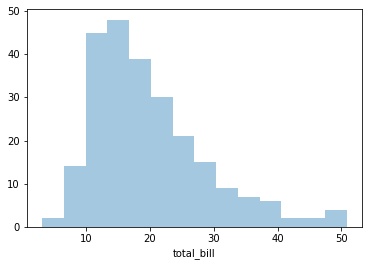

In [3]:
sns.distplot(tips["total_bill"], kde=False)

リスト5.4　ヒストグラムの基本的な描画例②

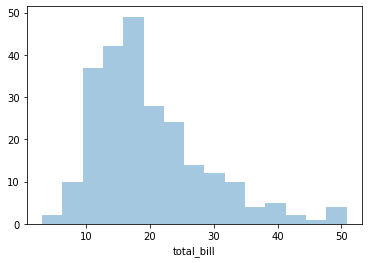

In [4]:
sns.distplot(tips["total_bill"], kde=False, bins=15)

リスト5.5　ヒストグラムの基本的な描画例③

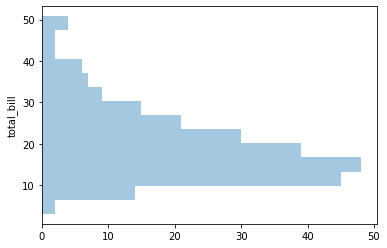

In [5]:
sns.distplot(tips["total_bill"], vertical=True, kde=False)

リスト5.6　ヒストグラムの応用的な描画例

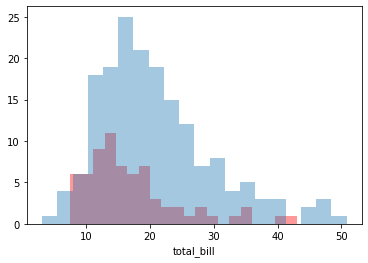

In [6]:
lunch_tips = tips[tips["time"] == "Lunch"]
dinner_tips = tips[tips["time"] == "Dinner"]
sns.distplot(lunch_tips["total_bill"], kde=False, bins=20, color="r")
sns.distplot(dinner_tips["total_bill"], kde=False, bins=20)

リスト5.7　カウントプロットの描画例①

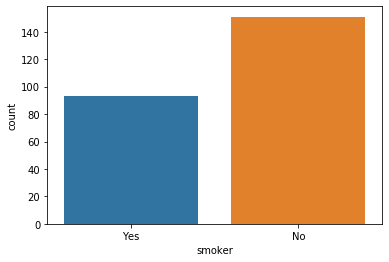

In [7]:
sns.countplot(x="smoker", data=tips)

リスト5.8　カウントプロットの描画例②

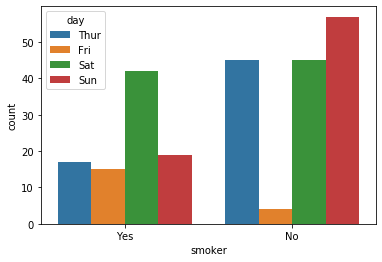

In [8]:
sns.countplot(x="smoker", hue="day", data=tips)

## ●03 ボックスプロット

リスト5.9　ボックスプロットの描画例①

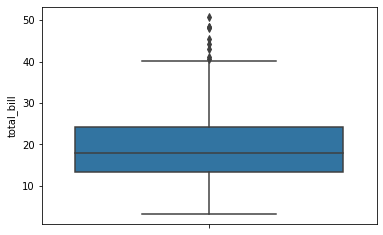

In [9]:
sns.boxplot(y="total_bill", data=tips)

リスト5.10　ボックスプロットの描画例②

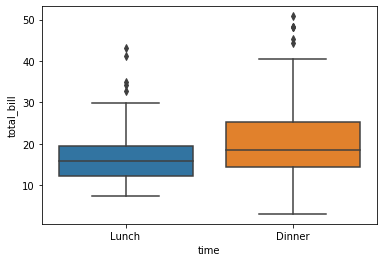

In [10]:
sns.boxplot(x="time", y="total_bill", data=tips)

リスト5.11　ボックスプロットの描画例③

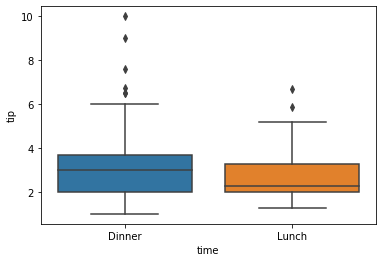

In [11]:
sns.boxplot(x="time", y="tip", order=["Dinner", "Lunch"], data=tips)

リスト5.12　ボックスプロットの描画例④

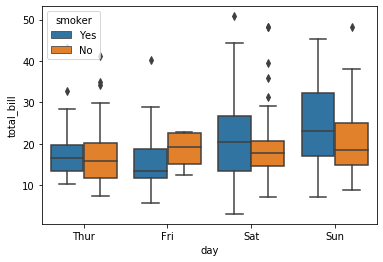

In [12]:
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips)

## ●04　散布図

リスト5.13　散布図の描画例①

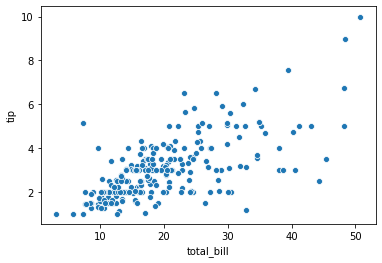

In [13]:
sns.scatterplot(x="total_bill", y="tip", data=tips)

リスト5.14　散布図の描画例②

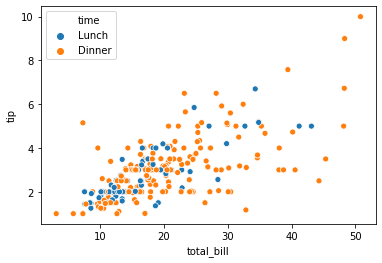

In [14]:
sns.scatterplot(x="total_bill", y="tip", hue="time", data=tips)

リスト5.15　散布図の描画例③

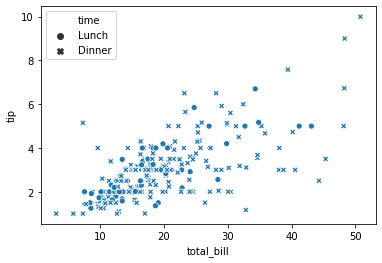

In [15]:
sns.scatterplot(x="total_bill", y="tip", style="time", data=tips)

リスト5.16　散布図の描画例④

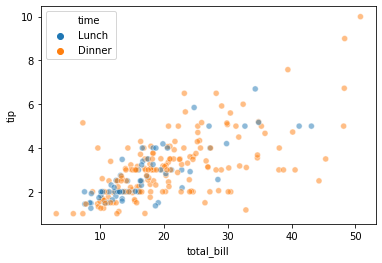

In [16]:
sns.scatterplot(x="total_bill", y="tip", hue="time", alpha=0.5, data=tips)

## ●05　バブルチャート

リスト5.17　バブルチャートの描画例①

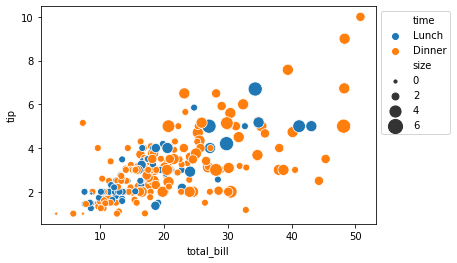

In [17]:
ax = sns.scatterplot(x="total_bill", y="tip", hue="time", size="size",
                     data=tips, sizes=(10, 200)) 
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

リスト5.18　バブルチャートの描画例②

In [18]:
fig = px.scatter(tips, x="total_bill", y="tip", size="size", color="time",
                 size_max=50) 
fig.show()

## ●06 散布図行列

リスト5.19　散布図行列の描画例①

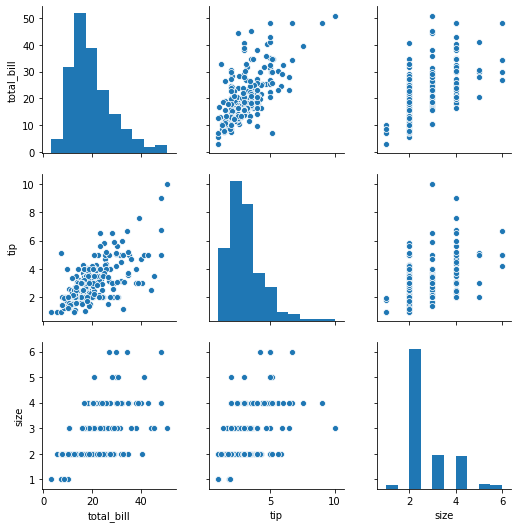

In [19]:
sns.pairplot(data=tips)

リスト5.20　散布図行列の描画例②

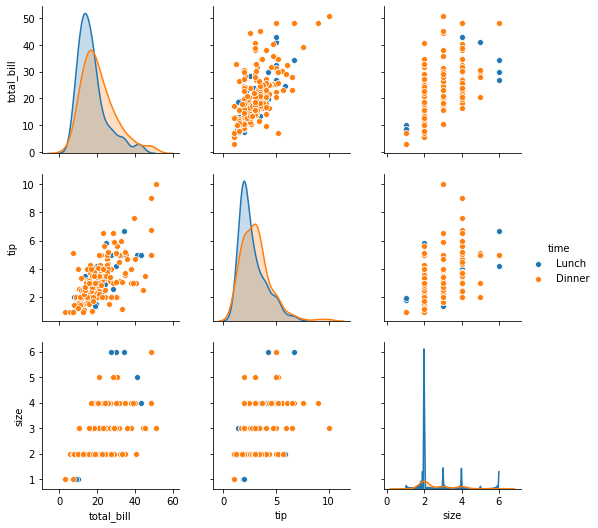

In [20]:
sns.pairplot(data=tips, hue="time")

## ●07　ジョイントプロット

リスト5.21　ジョイントプロットの描画例①

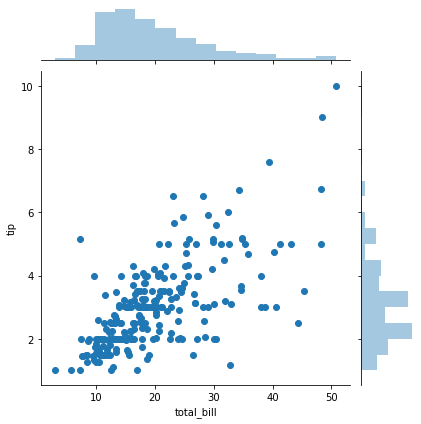

In [21]:
sns.jointplot(x="total_bill", y="tip", data=tips)

リスト5.22　ジョイントプロットの描画例②

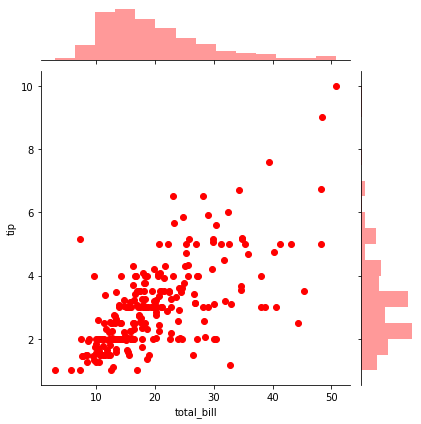

In [22]:
sns.jointplot(x="total_bill", y="tip", color="r", data=tips)

リスト5.23　ジョイントプロットの描画例③

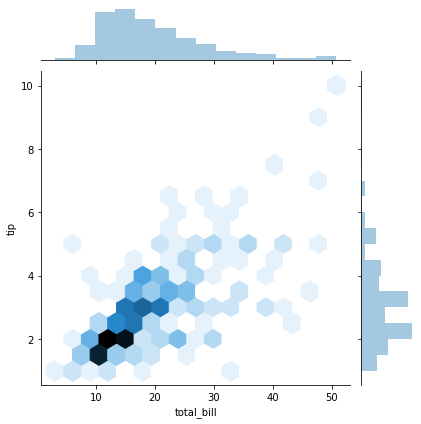

In [23]:
sns.jointplot(x="total_bill", y="tip", kind="hex", data=tips)

## ●08　質的変数のプロット

リスト5.24　質的変数のプロットの描画例

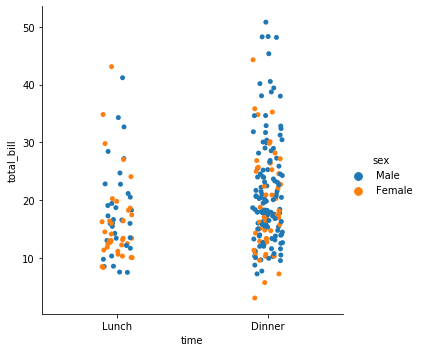

In [24]:
sns.catplot(x="time", y="total_bill", hue="sex", data=tips)

## ●09　平行座標プロット

リスト5.25　平行座標プロットの描画例

In [25]:
tips = sns.load_dataset("tips") 

fig = px.parallel_coordinates(tips,
    dimensions=["total_bill", "tip", "size"])

fig.show()

リスト5.26　パラレルセットグラフの描画例

In [26]:
tips = sns.load_dataset("tips")
fig = px.parallel_categories(tips)
fig.show()

## ●10　縦棒グラフ

リスト5.27　データの読み込み

In [27]:
tips = sns.load_dataset("tips")

リスト5.28　性別ごとのtip額の平均値のデータ

In [28]:
# 性別ごとにチップの平均額を算出
tips_mean = tips.groupby("sex", as_index=False).mean()
tips_mean

sex  total_bill       tip      size
0    Male   20.744076  3.089618  2.630573
1  Female   18.056897  2.833448  2.459770

リスト5.29　縦棒グラフの描画例①

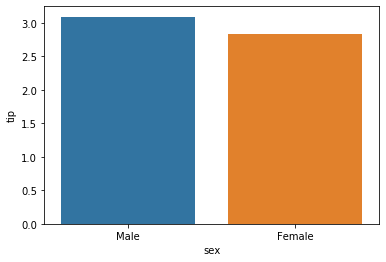

In [29]:
# 縦棒グラフを描画
sns.barplot(x="sex", y="tip", data=tips_mean)

リスト5.30　縦棒グラフの描画例②

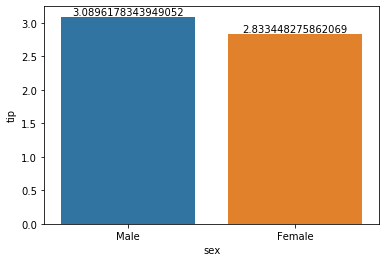

In [30]:
# 性別ごとにチップの平均額を算出
tips_mean = tips.groupby("sex", as_index=False).mean()
# 縦棒グラフとして表示
ax = sns.barplot(x="sex", y="tip", data=tips_mean)
# 数値を追加（実際は任意位置に任意文字列を追加している）
for index, row in tips_mean.iterrows():
    ax.text(index, row.tip, row.tip, ha="center", va="bottom")

リスト5.31　縦棒グラフの描画例③

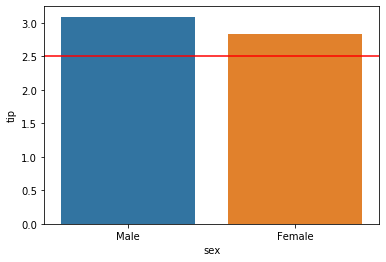

In [31]:
# 性別ごとにチップの平均額を算出
tips_mean = tips.groupby("sex", as_index=False).mean()
# 縦棒グラフとして表示
ax = sns.barplot(x="sex", y="tip", data=tips_mean)

# 数値（2.5）に線を引く
ax.axhline(2.5, color="red")

リスト5.32　性別・時間帯ごとのチップ額の平均値のデータ

In [32]:
tips_cross = pd.crosstab(index=tips["sex"], columns=tips["time"],
                         values=tips["tip"], aggfunc="sum") 
tips_cross

time    Lunch  Dinner
sex                  
Male    95.11  389.96
Female  90.40  156.11

リスト5.33　積み上げ縦棒グラフの描画例

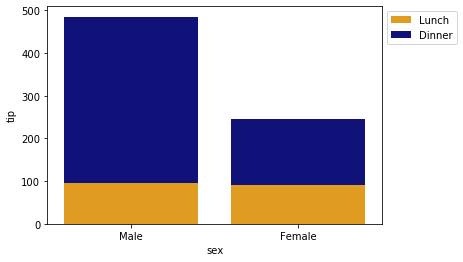

In [33]:
# 積み上げ縦棒グラフを描画 
f, ax = plt.subplots()
sns.barplot(x=tips_cross.index, y=tips_cross["Lunch"], 
            color="orange", label="Lunch") 
sns.barplot(x=tips_cross.index, y=tips_cross["Dinner"],
            color="darkblue", label="Dinner",
            bottom=tips_cross["Lunch"])
plt.ylabel("tip")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

リスト5.34　複数段の積み上げ縦棒グラフの描画例

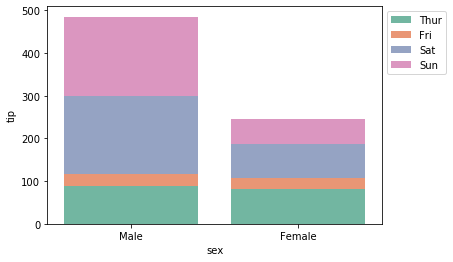

In [34]:
# 性別・曜日ごとにチップ額を集計する 
tips_sum = tips.groupby(["sex", "day"], as_index=False).sum() 
f, ax = plt.subplots() 

# 積み上げ縦棒グラフを描画
idx = 0
palette = sns.color_palette("Set2")
bottom = np.zeros(len(tips_sum.sex.unique()))
for day in tips_sum.day.unique():
    sns.barplot(x="sex", y="tip", 
                data=tips_sum[tips_sum.day == day],
                bottom=bottom, color=palette[idx],
                label=day)
    bottom += list(tips_sum[tips_sum.day == day]["tip"])
    idx += 1
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

リスト5.35　100％積み上げ縦棒グラフに使用するデータセットを作成

In [35]:
# 性別・時間帯ごとにチップ額の合計を行ごとに正規化したものを算出 
tips_cross_n = pd.crosstab(index=tips["sex"], columns=tips["time"], 
                           values=tips["tip"], aggfunc="sum",
                           normalize="index")
tips_cross_n

time       Lunch    Dinner
sex                       
Male    0.196075  0.803925
Female  0.366719  0.633281

リスト5.36　100%積み上げ縦棒グラフの描画例

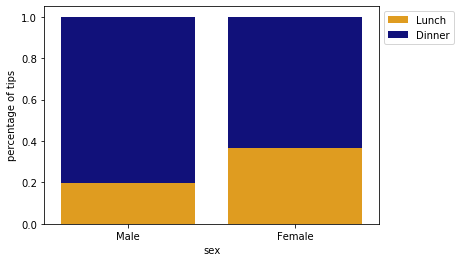

In [36]:
# 100％積み上げ縦棒グラフを描画
f, ax = plt.subplots()
sns.barplot(x=tips_cross_n.index, y=tips_cross_n["Lunch"],
            color="orange", label="Lunch")
sns.barplot(x=tips_cross_n.index, y=tips_cross_n["Dinner"],
            color="darkblue", bottom=tips_cross_n["Lunch"],
            label="Dinner")
plt.ylabel("percentage of tips")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

リスト5.36　複数段の積み上げ縦棒グラフの描画例

In [37]:
# 性別・曜日ごとにチップ額を集計する
tips_sum = tips.groupby(["sex", "day"], as_index=False).sum()
# 複数段の積み上げ縦棒グラフを描画
px.bar(tips_sum, x="sex", y="tip", color="day", text="tip")

リスト5.38　複数の要素を並べて描画する例

In [38]:
# 曜日ごとに各値の平均を算出
tips_mean = tips.groupby("day", as_index=False).mean()

# size列を消去
tips_mean = tips_mean.drop("size", axis=1)
tips_mean

day  total_bill       tip
0  Thur   17.682742  2.771452
1   Fri   17.151579  2.734737
2   Sat   20.441379  2.993103
3   Sun   21.410000  3.255132

In [39]:
# データフレームを整形
tips_mean = tips_mean.set_index("day")
tips_mean = tips_mean.stack().rename_axis(["day", "type"]).reset_index().rename(columns={0: "dollars"})
tips_mean


day        type    dollars
0  Thur  total_bill  17.682742
1  Thur         tip   2.771452
2   Fri  total_bill  17.151579
3   Fri         tip   2.734737
4   Sat  total_bill  20.441379
5   Sat         tip   2.993103
6   Sun  total_bill  21.410000
7   Sun         tip   3.255132

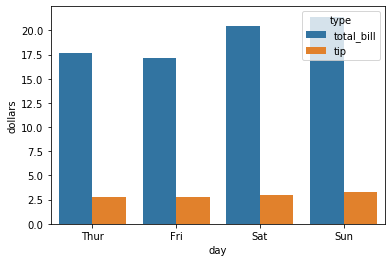

In [40]:
sns.barplot(x="day", y="dollars", hue="type", data=tips_mean)

リスト5.39　plotlyで複数の縦棒グラフを描画する例

In [41]:
tips_mean = tips.groupby("day", as_index=False).mean()
fig = go.Figure(data=[go.Bar(name="total_bill", 
                             x=tips_mean["day"],
                             y=tips_mean["total_bill"]),
                      go.Bar(name="tips", 
                             x=tips_mean["day"],
                             y=tips_mean["tip"])])
# 並べる
fig.update_layout(barmode="group")
fig.show()


リスト5.40　特定の縦棒グラフの色を変更する

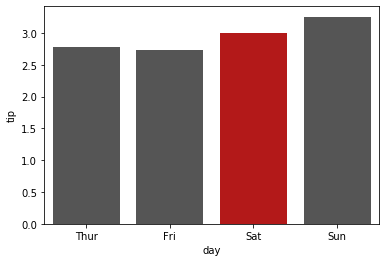

In [42]:
# 曜日ごとにチップの平均額を算出
tips_mean = tips.groupby("day", as_index=False).mean()
# 色の設定
default_color = "#555555"  # 標準の色
point_color = "#CC0000"  # 強調色
idx = 2 # 強調する縦棒グラフ

# パレットの作成
palette = sns.color_palette([default_color], len(tips_mean))
palette[idx] = sns.color_palette([point_color])[0]
sns.barplot(x="day", y="tip", data=tips_mean, palette=palette)

リスト5.41　特定の属性だけ色を変更して強調する

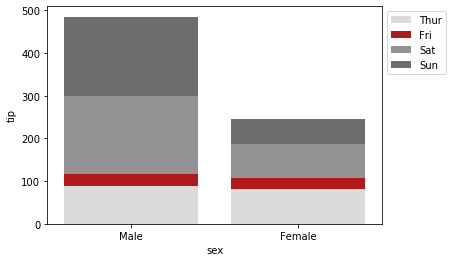

In [43]:
# 性別・曜日ごとにチップ額を集計する
tips_sum = tips.groupby(["sex", "day"], as_index=False).sum()

# 色の設定
point_color = "#CC0000"

# パレット作成
default_palette = sns.color_palette("binary")

f, ax = plt.subplots()
# 複数段の積み上げ縦棒グラフの描画
idx = 0
bottom = np.zeros(len(tips_sum.sex.unique()))
for day in tips_sum.day.unique():
    if day == "Fri":
        # 金曜日だけ強調する
        color = point_color
    else:
        color = default_palette[idx]
    idx += 1
    sns.barplot(x="sex", y="tip", data=tips_sum[tips_sum.day == day], 
                bottom=bottom, color=color, label=day)
    bottom += list(tips_sum[tips_sum.day == day]["tip"])

ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

## ●11　横棒グラフ

リスト5.42　横棒グラフの描画例

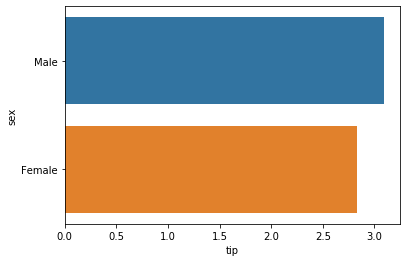

In [44]:
# 性別ごとにチップの平均額を算出
tips_mean = tips.groupby("sex", as_index=False).mean()

# 横棒グラフを描画
sns.barplot(x="tip", y="sex", data=tips_mean)

リスト5.43　積み上げ横棒グラフの描画例

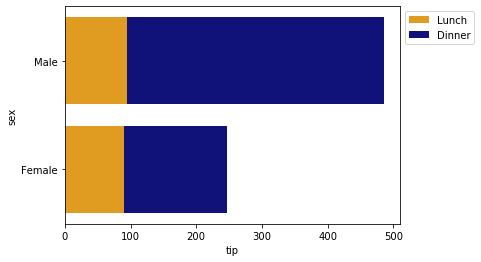

In [45]:
# 性別・時間帯ごとにチップ額の合計値を算出 
tips_cross = pd.crosstab(index=tips["sex"], columns=tips["time"],
                         values=tips["tip"], aggfunc="sum")
f, ax = plt.subplots()
# 積み上げ横棒グラフを描画
sns.barplot(x=tips_cross["Lunch"], y=tips_cross.index,
            color="orange", label="Lunch") 
sns.barplot(x=tips_cross["Dinner"], y=tips_cross.index,
            color="darkblue", left=tips_cross["Lunch"],
            label="Dinner") 
plt.xlabel("tip") 
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))


リスト5.44　2つ以上の積み上げ横棒グラフの描画例

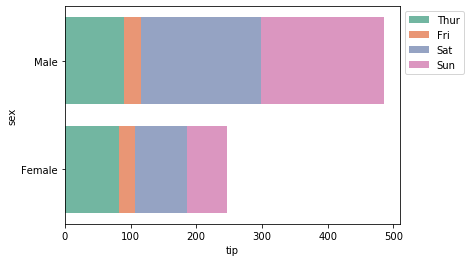

In [46]:
# 性別・曜日ごとにチップ額を集計する 
tips_sum = tips.groupby(["sex", "day"], as_index=False).sum()
# 複数段の積み上げ横棒グラフの描画
f, ax = plt.subplots() 
idx = 0

palette = sns.color_palette("Set2") 
left = np.zeros(len(tips_sum.sex.unique())) 
for day in tips_sum.day.unique():
    sns.barplot(x="tip", y="sex",
                data=tips_sum[tips_sum.day == day], left=left,
                color=palette[idx], label=day)
    left += list(tips_sum[tips_sum.day == day]["tip"])    
    idx += 1 
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

リスト5.45　2つ以上の積み上げ横棒グラフの描画例

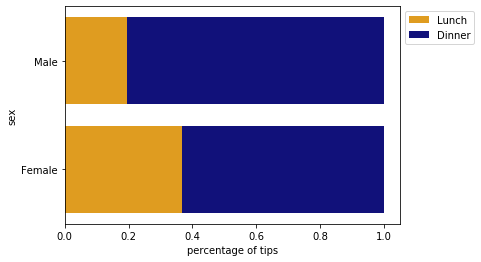

In [47]:
# 性別・時間帯ごとにチップ額の合計を行ごとに正規化したものを算出
tips_cross = pd.crosstab(index=tips["sex"], columns=tips["time"],
                         values=tips["tip"], aggfunc="sum", normalize="index") 
# 積み上げ横棒グラフを描画
f, ax = plt.subplots()
sns.barplot(x=tips_cross["Lunch"], y=tips_cross.index,
            color="orange", label="Lunch") 
sns.barplot(x=tips_cross["Dinner"], y=tips_cross.index,
            color="darkblue", left=tips_cross["Lunch"], label="Dinner") 
plt.xlabel("percentage of tips") 
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

リスト5.46　グラフの凡例を外側に表示する例

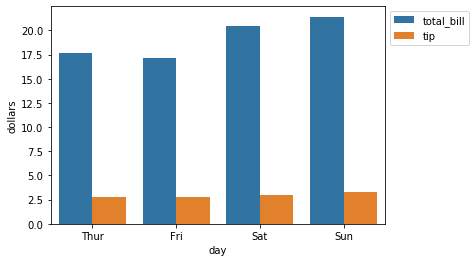

In [48]:
# 曜日ごとに各値の平均を算出 
tips_mean = tips.groupby("day", as_index=False).mean() 
# size列を消去
tips_mean = tips_mean.drop("size", axis=1)

# データフレームを整形 
tips_mean = tips_mean.set_index("day") 
tips_mean = tips_mean.stack().rename_axis(["day", "type"]).reset_index().rename(columns={0: "dollars"})

ax = sns.barplot(x="day", y="dollars", hue="type", data=tips_mean)

# 凡例を右上に表示
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

リスト5.47　グラフの凡例を右下に表示する例

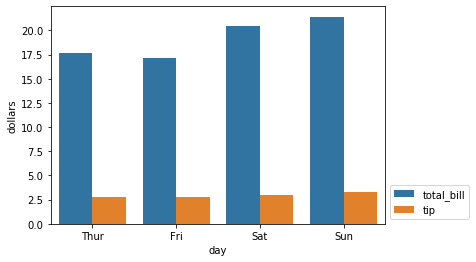

In [49]:
# 曜日ごとに各値の平均を算出 
tips_mean = tips.groupby("day", as_index=False).mean() 
# size列を消去 
tips_mean = tips_mean.drop("size", axis=1)

# データフレームを整形 
tips_mean = tips_mean.set_index("day") 
tips_mean = tips_mean.stack().rename_axis(["day", "type"]).reset_index().rename(columns={0: "dollars"})

ax = sns.barplot(x="day", y="dollars", hue="type", data=tips_mean)

# 凡例を右下に表示 
ax.legend(loc="lower left", bbox_to_anchor=(1, 0))

リスト5.48　グラフの凡例を中央下に表示する例

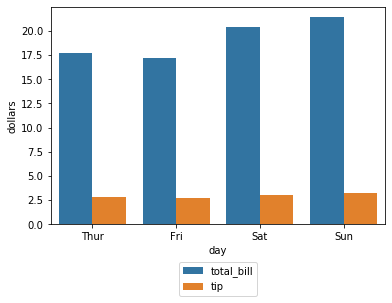

In [50]:
# 曜日ごとに各値の平均を算出 
tips_mean = tips.groupby("day", as_index=False).mean() 
# size列を消去 
tips_mean = tips_mean.drop("size", axis=1)

# データフレームを整形 
tips_mean = tips_mean.set_index("day") 
tips_mean = tips_mean.stack().rename_axis(["day", "type"]).reset_index().rename(columns={0: "dollars"})

ax = sns.barplot(x="day", y="dollars", hue="type", data=tips_mean)

# 凡例を中央下に表示
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15))

リスト5.49　複数のグラフを並べる（グラフ分割）例

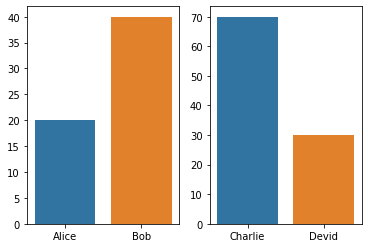

In [51]:
labels1 = ["Alice", "Bob"]
y1 = [20, 40]

labels2 = ["Charlie", "Devid"]
y2 = [70, 30]

f, axs = plt.subplots(1, 2)
sns.barplot(x=labels1, y=y1, ax=axs[0])
sns.barplot(x=labels2, y=y2, ax=axs[1])

リスト5.50　pandasデータフレームによる積み上げ縦棒グラフの描画例

In [52]:
titanic = sns.load_dataset("titanic")
df = pd.crosstab(titanic["class"], titanic["sex"])
df

sex     female  male
class               
First       94   122
Second      76   108
Third      144   347

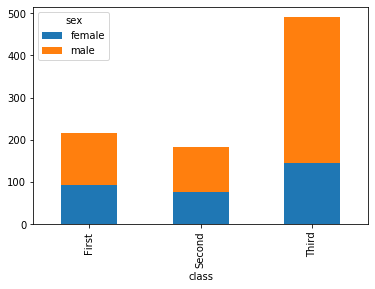

In [53]:
df.plot.bar(stacked=True)

リスト5.51　pandasデータフレームによる100％積み上げ縦棒グラフの描画例

In [54]:
df2 = pd.crosstab(titanic["class"], titanic["sex"], normalize="index")
df2

sex       female      male
class                     
First   0.435185  0.564815
Second  0.413043  0.586957
Third   0.293279  0.706721

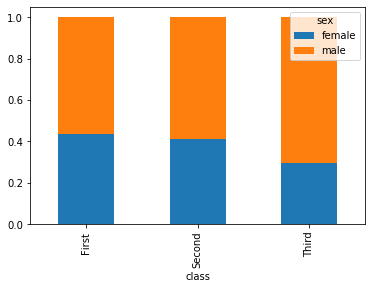

In [55]:
df2.plot.bar(stacked=True)

リスト5.52　pandasデータフレームによる積み上げ横棒グラフの描画例

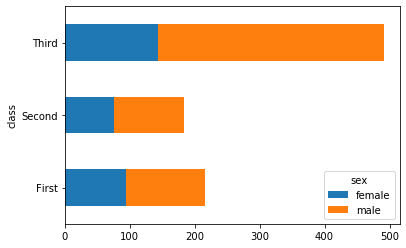

In [56]:
df.plot.barh(stacked=True)

リスト5.53　pandasデータフレームによる100%積み上げ横棒グラフの描画例

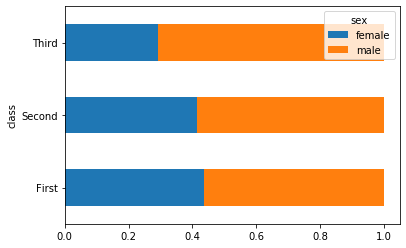

In [57]:
df2.plot.barh(stacked=True)

## ●12　円グラフ

リスト5.54　デフォルト設定の円グラフの描画例

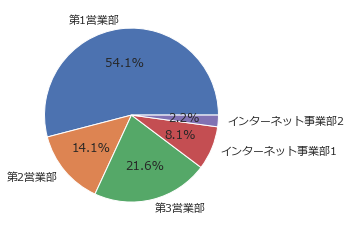

In [58]:
sns.set(font="Meiryo")

# データ定義 
sales_dep = pd.DataFrame({
    "label": ["第1営業部", "第2営業部", "第3営業部",
              "インターネット事業部1", "インターネット事業部2"],
    "value": [500, 130, 200, 75, 20]})

plt.pie(sales_dep["value"], labels=sales_dep["label"],
        autopct="%1.1f%%")
plt.show()

リスト5.55　12時の位置から始まる円グラフの描画例

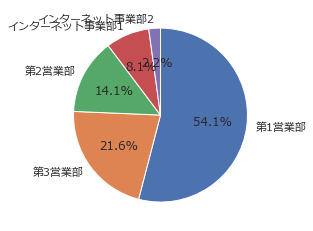

In [59]:
sns.set(font="Meiryo") 

# データ定義 
sales_dep = pd.DataFrame({
    "label": ["第1営業部", "第2営業部", "第3営業部",
              "インターネット事業部1", "インターネット事業部2"],
    "value": [500, 130, 200, 75, 20]})

# ソート（今回は最初からソート済み） 
sales_dep = sales_dep.sort_values("value", ascending=False) 
plt.pie(sales_dep["value"], labels=sales_dep["label"],
        autopct="%1.1f%%", startangle=90, counterclock=False) 
plt.show()

リスト5.56　強調したい扇形だけ色を変更した描画例

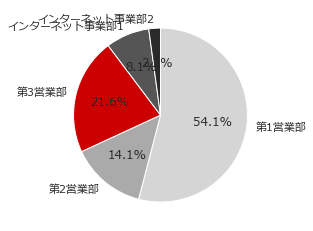

In [60]:
sns.set(font="Meiryo") 

# データ定義 
sales_dep = pd.DataFrame({
    "label": ["第1営業部", "第2営業部", "第3営業部",
              "インターネット事業部1", "インターネット事業部2"],
    "value": [500, 130, 200, 75, 20]})

# 強調したい扇形のラベル 
point_label = "第3営業部" 
# 強調色 
point_color = "#CC0000" 
# 特定のラベルに対する色指定を変更する
palette = sns.color_palette("binary", len(sales_dep)) 
for i in sales_dep[sales_dep.label == point_label].index.values:
    palette[i] = point_color 

plt.pie(sales_dep["value"], labels=sales_dep["label"],
        autopct="%1.1f%%", startangle=90, counterclock=False,
        colors=palette)
plt.show()

リスト5.57　plotlyによる円グラフの描画例

In [61]:
sales_dep = pd.DataFrame({
    "label": ["第1営業部", "第2営業部", "第3営業部", 
              "インターネット事業部1", "インターネット事業部2"],
    "value": [500, 320, 130, 75, 20]})
fig = go.Figure(data=[go.Pie(labels=sales_dep["label"],
                             values=sales_dep["value"])]) 
fig.show()

## ●ドーナツグラフ

リスト5.58　ドーナツグラフの描画例

In [62]:
# データ 
sales_dep = pd.DataFrame({
    "label": ["第1営業部", "第2営業部", "第3営業部",
              "インターネット事業部1", "インターネット事業部2"],
    "value": [500, 320, 130, 75, 20]}) 

# Pieグラフ部分 
fig = go.Figure(data=[go.Pie(labels=sales_dep["label"],
                             values=sales_dep["value"],
                             hole=0.5)]) 
                              
# グラフタイトルとドーナツ部分の文字列 
fig.update_layout(title_text="部署別売上",
                  annotations=[{
                                "text": "売上構成",
                                "x": 0.5,
                                "y": 0.5,
                                "font_size": 20,
                                "showarrow": False}]) 
# 表示 
fig.show()

## ●14　折れ線グラフ

リスト5.59　日本の各都市の平均気温の1年分のデータ

In [63]:
weather = pd.read_csv("weather_sample.csv", header=0, parse_dates=["年月"]) 
weather

年月  東京-平均気温(℃)  東京-降水量の合計(mm)  東京-日照時間(時間)  大阪-平均気温(℃)  \
0  2015-01-01         5.8           92.5        182.0         6.1   
1  2015-02-01         5.7           62.0        166.9         6.9   
2  2015-03-01        10.3           94.0        194.2        10.2   
3  2015-04-01        14.5          129.0        149.5        15.9   
4  2015-05-01        21.1           88.0        240.6        21.5   
5  2015-06-01        22.1          195.5        137.3        22.9   
6  2015-07-01        26.2          234.5        181.8        27.0   
7  2015-08-01        26.7          103.5        137.6        28.6   
8  2015-09-01        22.6          503.5        113.3        23.2   
9  2015-10-01        18.4           57.0        181.3        19.0   
10 2015-11-01        13.9          139.5        120.1        15.2   
11 2015-12-01         9.3           82.5        162.0        10.1   
12 2016-01-01         6.1           85.0        201.5         6.8   
13 2016-02-01         7.2           57.0        160.1         7.4   
14 2016-03-01        10.1          103.0        161.9        10.8   
15 2016-04-01        15.4          120.0        149.2        16.6   
16 2016-05-01        20.2          137.5        204.9        21.2   
17 2016-06-01        22.4          174.5        139.1        23.3   
18 2016-07-01        25.4           81.5        143.7        28.0   
19 2016-08-01        27.1          414.0        156.5        29.5   
20 2016-09-01        24.4          287.0         79.4        25.8   
21 2016-10-01        18.7           96.5        119.6        20.3   
22 2016-11-01        11.4          139.0        132.1        13.4   
23 2016-12-01         8.9           84.0        193.7         9.4   
24 2017-01-01         5.8           26.0        226.7         6.2   
25 2017-02-01         6.9           15.5        193.7         6.3   
26 2017-03-01         8.5           85.5        190.3         9.2   
27 2017-04-01        14.7          122.0        198.8        15.7   
28 2017-05-01        20.0           49.0        216.9        21.1   
29 2017-06-01        22.0          106.5        158.8        22.7   
30 2017-07-01        27.3           81.0        189.1        28.8   
31 2017-08-01        26.4          141.5         83.7        29.2   
32 2017-09-01        22.8          209.5        124.4        24.4   
33 2017-10-01        16.8          531.5         94.7        18.4   
34 2017-11-01        11.9           47.0        162.7        12.6   
35 2017-12-01         6.6           15.0        211.1         7.0   
36 2018-01-01         4.7           48.5        206.1         5.0   
37 2018-02-01         5.4           20.0        167.3         5.3   
38 2018-03-01        11.5          220.0        198.0        11.5   
39 2018-04-01        17.0          109.0        201.8        16.9   
40 2018-05-01        19.8          165.5        199.3        20.1   
41 2018-06-01        22.4          155.5        163.1        23.4   
42 2018-07-01        28.3          107.0        227.2        29.5   
43 2018-08-01        28.1           86.5        217.4        29.7   
44 2018-09-01        22.9          365.0         96.7        24.1   
45 2018-10-01        19.1           61.5        139.0        19.7   
46 2018-11-01        14.0           63.0        151.0        14.6   
47 2018-12-01         8.3           44.0        145.3         9.4   

    大阪-降水量の合計(mm)  大阪-日照時間(時間)  那覇-平均気温(℃)  那覇-降水量の合計(mm)  那覇-日照時間(時間)  \
0            93.0        123.3        16.6           22.0         90.7   
1            25.5        136.8        16.8           47.0        114.1   
2           174.5        175.4        19.0           95.5        126.5   
3           107.0        152.1        22.2          100.0        118.9   
4           104.0        249.3        24.9          197.5        144.2   
5           196.0        144.1        28.7           38.0        221.7   
6           358.0        168.2        29.0          369.0        202.3   
7           185.5        202.3       

リスト5.60　折れ線グラフのの描画例①

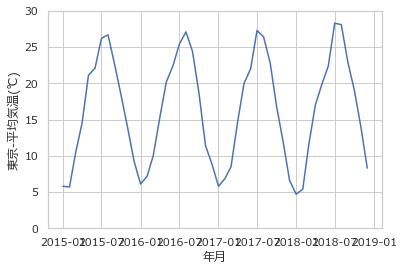

In [64]:
sns.set(style="whitegrid", font="meiryo")

# デフォルトでは軸の最小が0にならないためy軸を指定する
plt.ylim([0, 30])

sns.lineplot(data=weather, x="年月", y="東京-平均気温(℃)")

リスト5.61　折れ線グラフのの描画例②

(array([735599., 735780., 735964., 736146., 736330., 736511., 736695.,
        736876., 737060.]), <a list of 9 Text xticklabel objects>)

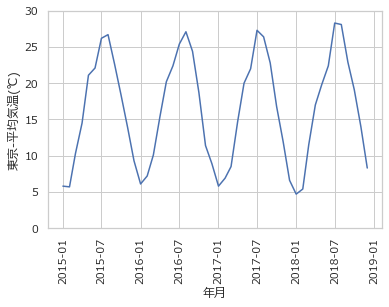

In [65]:
sns.set(style="whitegrid", font="meiryo")
plt.ylim([0, 30])
sns.lineplot(data=weather, x="年月", y="東京-平均気温(℃)")

# 年月を90度回転させて縦表示にして見えるようにする
plt.xticks(rotation=90)

リスト5.62　東京、大阪、那覇、函館の平均気温のデータ

In [66]:
weather_index = pd.read_csv("weather_sample.csv", header=0,
                             parse_dates=["年月"], index_col=0) 
tmp_ave = weather_index[["東京-平均気温(℃)", "大阪-平均気温(℃)",
                         "那覇-平均気温(℃)", "函館-平均気温(℃)"]] 
tmp_ave

東京-平均気温(℃)  大阪-平均気温(℃)  那覇-平均気温(℃)  函館-平均気温(℃)
年月                                                        
2015-01-01         5.8         6.1        16.6        -0.9
2015-02-01         5.7         6.9        16.8         0.1
2015-03-01        10.3        10.2        19.0         4.3
2015-04-01        14.5        15.9        22.2         8.3
2015-05-01        21.1        21.5        24.9        13.2
2015-06-01        22.1        22.9        28.7        16.6
2015-07-01        26.2        27.0        29.0        21.0
2015-08-01        26.7        28.6        28.7        22.2
2015-09-01        22.6        23.2        27.8        18.2
2015-10-01        18.4        19.0        25.5        11.0
2015-11-01        13.9        15.2        23.8         7.3
2015-12-01         9.3        10.1        20.1         1.8
2016-01-01         6.1         6.8        17.4        -2.5
2016-02-01         7.2         7.4        16.9        -1.3
2016-03-01        10.1        10.8        18.7         3.0
2016-04-01        15.4        16.6        23.0         8.0
2016-05-01        20.2        21.2        25.7        14.3
2016-06-01        22.4        23.3        28.4        16.0
2016-07-01        25.4        28.0        29.8        20.3
2016-08-01        27.1        29.5        29.5        23.7
2016-09-01        24.4        25.8        28.4        19.5
2016-10-01        18.7        20.3        27.7        10.9
2016-11-01        11.4        13.4        23.2         3.7
2016-12-01         8.9         9.4        20.5         0.8
2017-01-01         5.8         6.2        18.4        -1.9
2017-02-01         6.9         6.3        17.1        -1.0
2017-03-01         8.5         9.2        18.3         2.0
2017-04-01        14.7        15.7        21.6         8.2
2017-05-01        20.0        21.1        24.2        13.4
2017-06-01        22.0        22.7        26.6        15.8
2017-07-01        27.3        28.8        29.9        22.5
2017-08-01        26.4        29.2        30.4        20.3
2017-09-01        22.8        24.4        28.9        18.1
2017-10-01        16.8        18.4        27.0        11.8
2017-11-01        11.9        12.6        22.8         5.2
2017-12-01         6.6         7.0        18.0        -1.4
2018-01-01         4.7         5.0        17.2        -1.8
2018-02-01         5.4         5.3        16.9        -3.2
2018-03-01        11.5        11.5        19.9         3.4
2018-04-01        17.0        16.9        21.6         8.0
2018-05-01        19.8        20.1        25.6        12.5
2018-06-01        22.4        23.4        27.8        16.3
2018-07-01        28.3        29.5        28.3        21.2
2018-08-01        28.1        29.7        28.5        21.3
2018-09-01        22.9        24.1        28.4        18.7
2018-10-01        19.1        19.7        23.9        13.9
2018-11-01        14.0        14.6        23.1         7.2
2018-12-01         8.3         9.4        20.4        -0.3

リスト5.63　複数の折れ線グラフを1つのグラフ内に描画する例

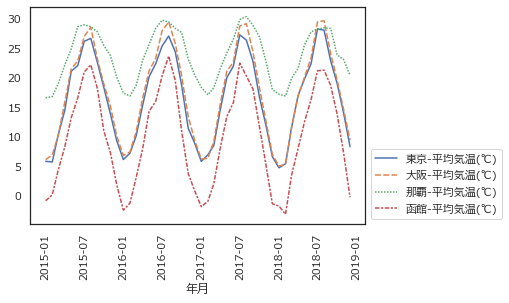

In [67]:
# 折れ線グラフを描画
sns.set(style="white", font="meiryo")
ax = sns.lineplot(data=tmp_ave)

# ラベルと凡例を適正にする
plt.xticks(rotation=90)
ax.legend(loc="lower left", bbox_to_anchor=(1, 0))

リスト5.64　複数の折れ線グラフの線の種類を同じにする例

            年月    category  value
0   2015-01-01  東京-平均気温(℃)    5.8
1   2015-01-01  大阪-平均気温(℃)    6.1
2   2015-01-01  那覇-平均気温(℃)   16.6
3   2015-01-01  函館-平均気温(℃)   -0.9
4   2015-02-01  東京-平均気温(℃)    5.7
..         ...         ...    ...
187 2018-11-01  函館-平均気温(℃)    7.2
188 2018-12-01  東京-平均気温(℃)    8.3
189 2018-12-01  大阪-平均気温(℃)    9.4
190 2018-12-01  那覇-平均気温(℃)   20.4
191 2018-12-01  函館-平均気温(℃)   -0.3

[192 rows x 3 columns]


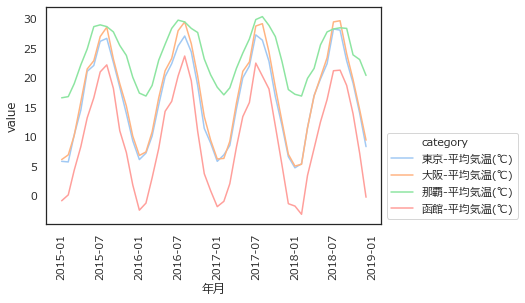

In [68]:
# データの整形
sns.set(style="white", font="meiryo") 
tmp_stack = tmp_ave.stack().rename_axis(["年月", "category"]).reset_index().rename(columns={0: "value"}) 
print(tmp_stack)

# 折れ線グラフを描画
sns.set(style="white", font="meiryo") 
ax = sns.lineplot(data=tmp_stack, x="年月", y="value", hue="category",
                  palette="pastel") 
# ラベルと凡例を適正にする 
plt.xticks(rotation=90) 
ax.legend(loc="lower left", bbox_to_anchor=(1, 0))

リスト5.65　特定の折れ線グラフを強調した描画例

            年月    category  value
0   2015-01-01  東京-平均気温(℃)    5.8
1   2015-01-01  大阪-平均気温(℃)    6.1
2   2015-01-01  那覇-平均気温(℃)   16.6
3   2015-01-01  函館-平均気温(℃)   -0.9
4   2015-02-01  東京-平均気温(℃)    5.7
..         ...         ...    ...
187 2018-11-01  函館-平均気温(℃)    7.2
188 2018-12-01  東京-平均気温(℃)    8.3
189 2018-12-01  大阪-平均気温(℃)    9.4
190 2018-12-01  那覇-平均気温(℃)   20.4
191 2018-12-01  函館-平均気温(℃)   -0.3

[192 rows x 3 columns]


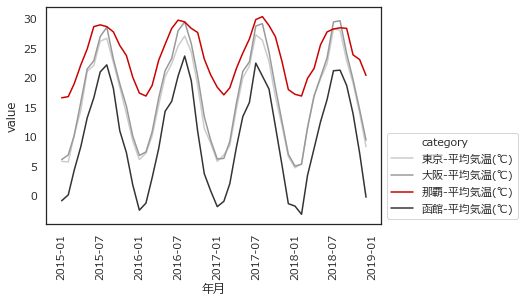

In [69]:
sns.set(style="white", font="meiryo") 
tmp_stack = tmp_ave.stack().rename_axis(["年月", "category"]).reset_index().rename(columns={0: "value"}) 
print(tmp_stack)

# カテゴリ数を数える 
num_category = len(tmp_stack["category"].unique()) 
# 色の設定 
point_color = "#CC0000"

# 変更したいカテゴリの番号 
point_number = 2

# 元になるパレットの作成 
palette = sns.color_palette("gray_r", num_category)

# パレットの一部の色を変更する 
palette[point_number] = point_color 

# 折れ線グラフを描画 
ax = sns.lineplot(data=tmp_stack, x="年月", y="value", hue="category",
                  palette=palette) 
# ラベルと凡例を適正にする 
plt.xticks(rotation=90) 
ax.legend(loc="lower left", bbox_to_anchor=(1, 0))


リスト5.66　plotlyを利用した折れ線グラフの描画例

In [70]:
fig = px.line(weather, x="年月", y="東京-平均気温(℃)")
fig.show()

リスト5.87　plotlyを利用した複数の折れ線グラフの描画例

In [71]:
tmp_tokyo = go.Scatter(x=weather["年月"], y=weather["東京-平均気温(℃)"], 
                       mode="lines", name="東京") 
tmp_osaka = go.Scatter(x=weather["年月"], y=weather["大阪-平均気温(℃)"],
                       mode="lines", name="大阪")
tmp_naha = go.Scatter(x=weather["年月"], y=weather["那覇-平均気温(℃)"],
                      mode="lines", name="那覇")
tmp_hakodate = go.Scatter(x=weather["年月"], y=weather["函館-平均気温(℃)"],
                          mode="lines", name="函館") 
# レイアウトの指定 
layout = go.Layout(xaxis=dict(title="各都市の平均気温", type="date",
                              dtick="M1"), # dtick:'M1'で1ヶ月ごとにラベルを表示
                   yaxis=dict(title="気温"))
fig = go.Figure(data=[tmp_tokyo, tmp_osaka, tmp_naha, tmp_hakodate], 
                layout=layout)
fig.show()

## ●15　ヒートマップ

リスト5.68　カフェの商品の月別の販売量のデータ

In [72]:
# データ読み込みとデータ定義
cafe = pd.read_csv("cafe.csv", header=0, index_col=0)
cafe

1月   2月   3月   4月   5月   6月   7月   8月   9月  10月  11月  12月
商品                                                                  
ホットコーヒー   980  828  823  650  732  653  763  650  791  732  758  996
アイスコーヒー   314  269  419  596  669  672  840  944  903  555  865  318
ホットティー    670  678  500  418  469  471  320  380  420  390  606  558
アイスティー    280  320  430  450  550  580  628  734  494  304  473  280
クッキー      311  332  200  403  350  369  219  328  316  379  434  366
アイスクリーム   150  128  200  284  319  320  650  559  500  265  412  152
プレーンドーナツ  205  278  249  424  372  371  426  269  200  297  427  311
チョコドーナツ   242  296  387  358  335  407  447  449  163  229  354  301
サンドイッチ    124  174  147  184  160  187  149  195  145  156  126  200

リスト5.69　ヒートマップの描画例①

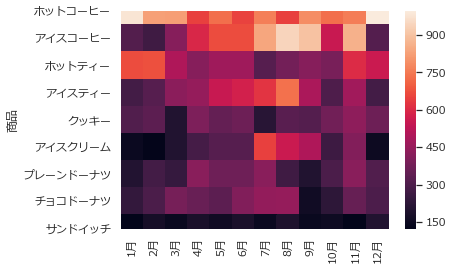

In [73]:
sns.set(font="meiryo")
sns.heatmap(cafe)

リスト5.70　ヒートマップの描画例②

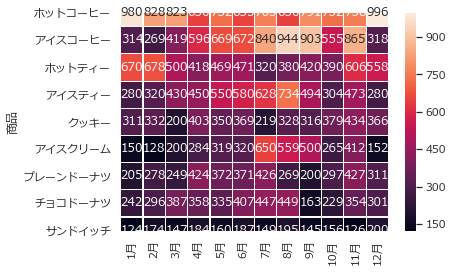

In [74]:
sns.heatmap(cafe, linewidths=.1, annot=True, fmt="d")

リスト5.71　ヒートマップの描画例③

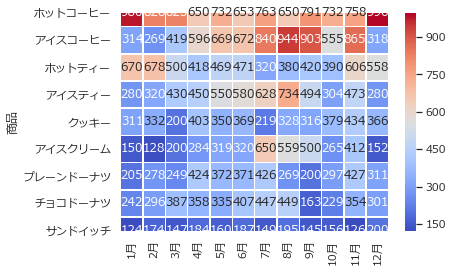

In [75]:
sns.heatmap(cafe, linewidths=.5, cmap="coolwarm", fmt="d", annot=True)

## ●16　ウォーターフォールチャート

リスト5.72　ウォーターフォールチャートの描画例

In [76]:
fig = go.Figure(go.Waterfall(    
    # 絶対値か差分を指定する    
    measure=["absolute", "relative", "relative", "relative", "relative",
             "total"],
    # 項目を定義    
    x=["前月末残", "バイト代", "給料", "変動費", "固定費", "今月末残"],    
    #ラベルの項目を定義
    textposition = "outside",
    text=["30", "+10", "+50", "-32", "-10", "48"],
    # 数値の定義
    y=[30, 10, 50, -32, -10, 0],
    connector={"line": {"color": "rgb(0, 0, 0)"}}))

fig.update_layout(title="私の口座の動き",
                  showlegend=True )
fig.show()

## ●17　ツリーマップ

リスト5.73　ツリーマップの描画例

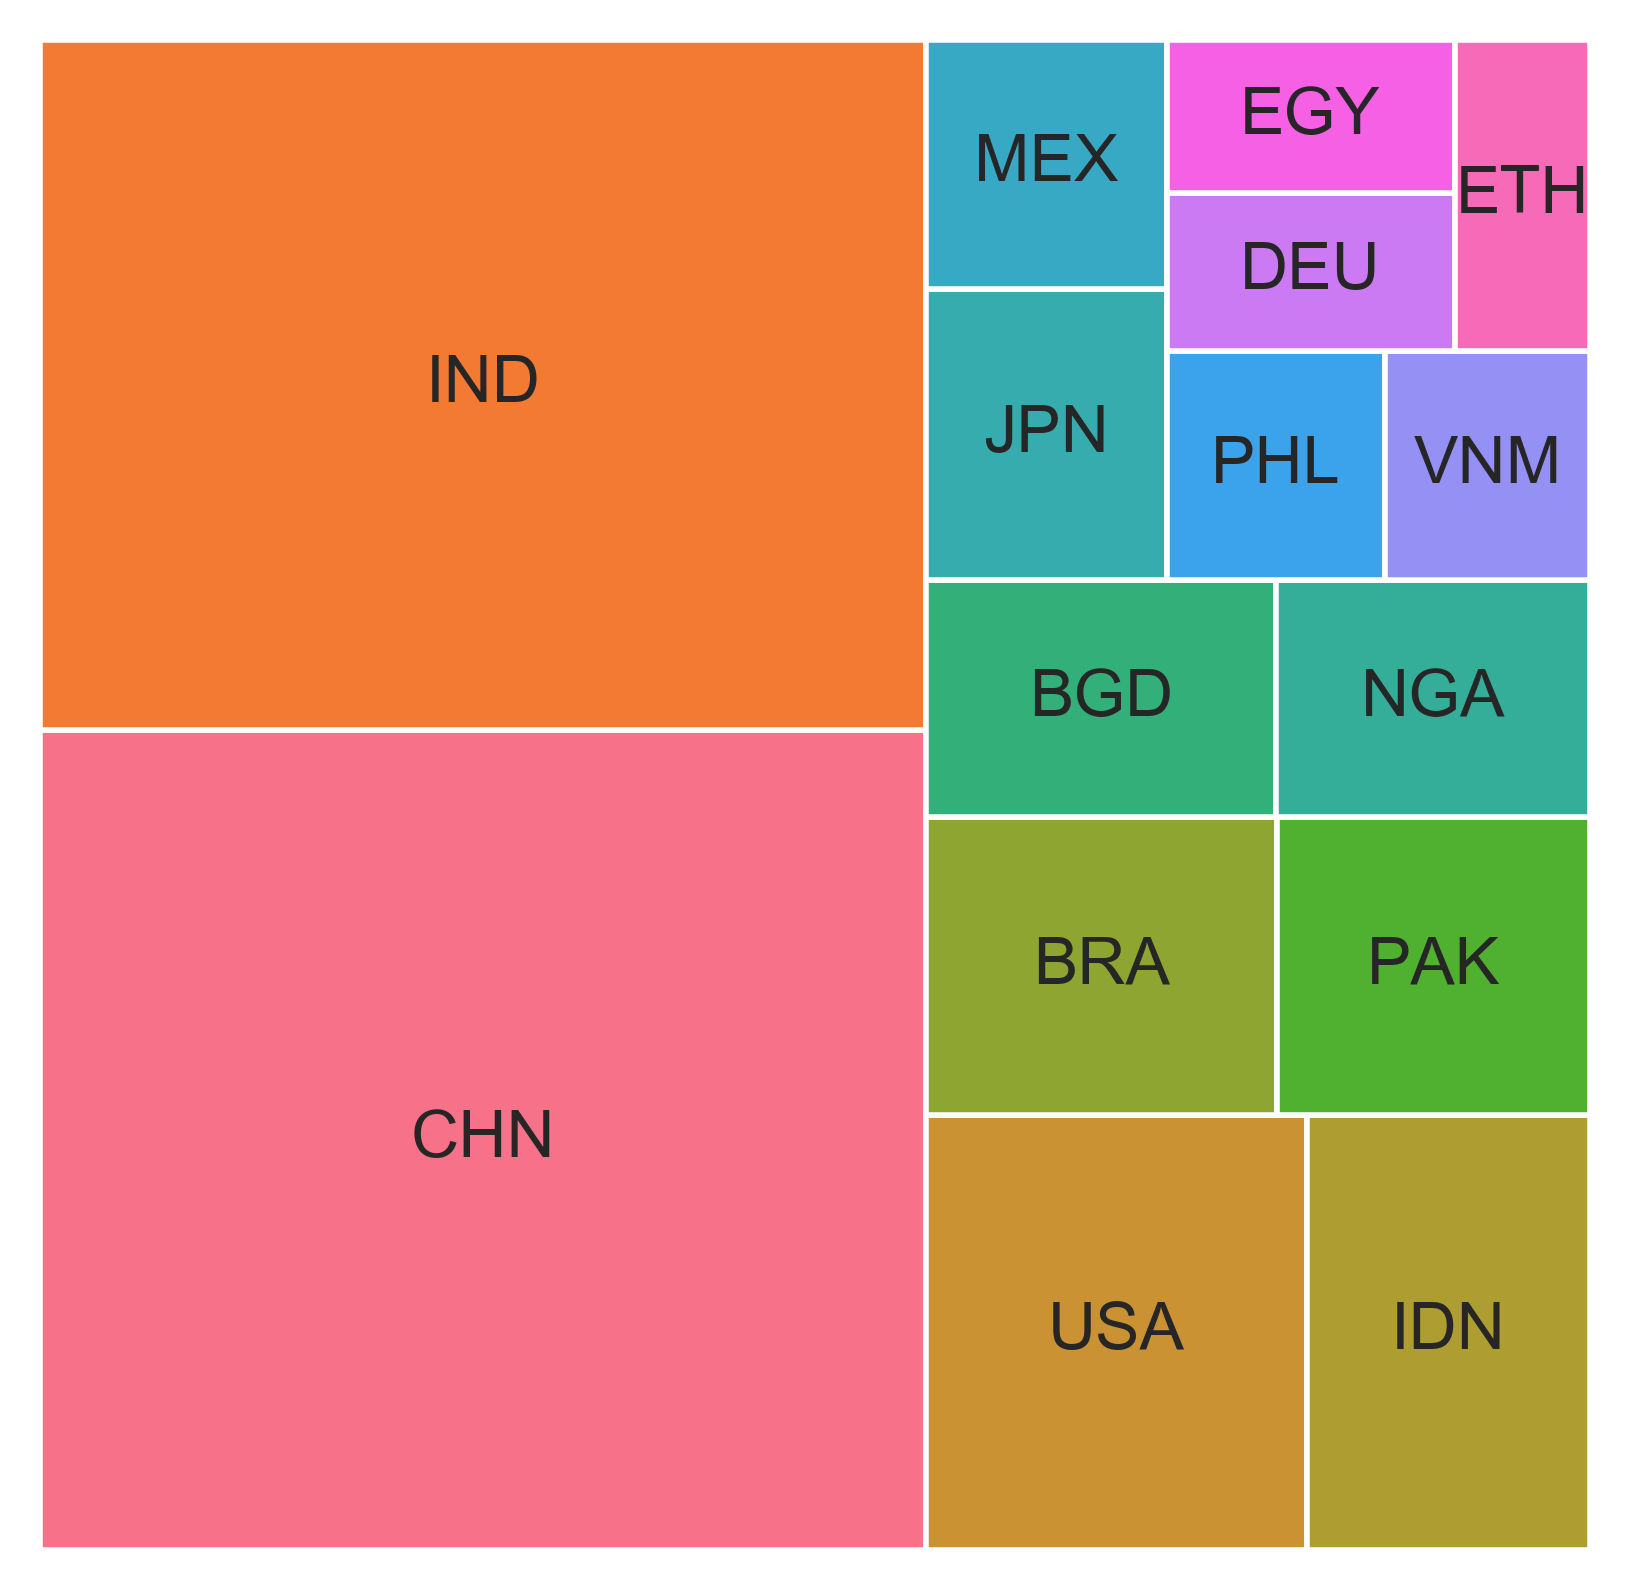

In [77]:
# サイズ調整
sns.set(rc={"figure.figsize": (5, 5),
            "figure.dpi": 400})

# plotlyに含まれる2007年の人口の情報を取得
pop_df = px.data.gapminder().query("year == 2007")

# 人口により降順ソート
pop_df = pop_df.sort_values("pop", ascending=False)

# 上位15件のみを取得
pop_df = pop_df.head(15)

# 人口
pop = list(pop_df["pop"])

# 国コード
code = list(pop_df["iso_alpha"])

# ツリーマップを描画
squarify.plot(pop, label=code, 
              color=sns.color_palette("husl", len(pop)))

# 軸ラベルオフ
plt.axis("off")
plt.show()

## ●18　サンバーストチャート

リスト5.74　サンバーストチャートの描画例

In [78]:
# データ定義
org = [
        {"name": "全社", "parent": "", "num": 50},
        {"name": "人事・総務部", "parent": "全社", "num": 10},
        {"name": "営業部", "parent": "全社", "num": 20},
        {"name": "第1営業室", "parent": "営業部", "num": 15},
        {"name": "第2営業室", "parent": "営業部", "num": 5},
        {"name": "開発部", "parent": "全社", "num": 20},
        {"name": "第1開発室", "parent": "開発部", "num": 10},
        {"name": "第2開発室", "parent": "開発部", "num": 7},
        {"name": "相談窓口", "parent": "開発部", "num": 3},
    ]

# グラフ定義
trace = go.Sunburst(labels=[record["name"] for record in org],
                    parents=[record["parent"] for record in org],
                    values=[record["num"] for record in org],
                    branchvalues="total",
                    outsidetextfont={"size": 30, "color": "#82A9DA"},
)

# レイアウト定義
layout = go.Layout(margin=go.layout.Margin(t=0, l=0, r=0, b=0))

# 描画
plotly.offline.iplot(go.Figure([trace], layout))

## ●19　レーダーチャート

リスト5.75　1つのレーダーチャートの描画例

In [79]:
# データ定義
data = [
    {"label": "品質", "value": 5},
    {"label": "価格", "value": 4},
    {"label": "配達", "value": 2.7},
    {"label": "カスタマーサービス", "value": 3.4},
    {"label": "サイトの使いやすさ", "value": 4.3},
    {"label": "写真と実物の一致度", "value": 3.5},
]

df = pd.DataFrame({
    "label": [record["label"] for record in data],
    "value": [record["value"] for record in data],
})

print(df)

# グラフ定義
fig = px.line_polar(df, r="value", theta="label", line_close=True)

# レイアウト定義
fig.update_traces(fill="toself")

# 描画
fig.show()

       label  value
0         品質    5.0
1         価格    4.0
2         配達    2.7
3  カスタマーサービス    3.4
4  サイトの使いやすさ    4.3
5  写真と実物の一致度    3.5


リスト5.76　複数のレーダーチャートを重ねた描画例

In [80]:
# データ定義 
data = [
    {
        "氏名": "顧客1",
        "品質": 5,
        "価格": 4,
        "配達": 2.7,
        "カスタマーサービス": 3.4,
        "サイトの使いやすさ": 4.3,
        "写真と実物の一致度": 3.5
    },
    {
        "氏名": "顧客2",
        "品質": 4,
        "価格": 3,
        "配達": 4.5,
        "カスタマーサービス": 4.5,
        "サイトの使いやすさ": 1,
        "写真と実物の一致度": 4.5
    }
]

# データフレーム化 
df = pd.DataFrame(data).set_index("氏名") 
# データフレームを整形
df = df.stack().rename_axis(["氏名", "label"]).reset_index().rename(columns={0: "value"}) 

fig = px.line_polar(df, r="value", theta="label", color="氏名", line_close=True) 
fig.show()